# Project 1

Use `tf.keras` to construct a fully-connected neural network with over 98.3% test accuracy on the MNIST dataset.

- Use `keras` to load the dataset.
- Create your models using the Sequential API.
- Train the models using the training dataset.
- Tune hyperparameters to achieve an accuracy rate of at least 98.3% on the **test** set. 
- In your submission, briefly describe what models were created and how hyperparameters were tuned.

In [21]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the input data to a 2D tensor with shape (num_samples, 784)
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255

#standardize
# mean = np.mean(x_train)
# stdev = np.std(x_train)
# train_images = (x_train - mean) / stdev
# test_images = (x_test - mean) / stdev

# Convert the labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)



In [22]:
# Define the model architecture
# model = keras.models.Sequential([
#     keras.layers.Dense(128, activation='relu', input_shape=(784,)),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(10, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with various batch sizes and hidden layers/neurons
batch_sizes = [ 128, 196]
hidden_layers = [1, 2, 3]
hidden_neurons = [128, 256, 350]

histories = []
results = {}
for batch_size in batch_sizes:
    for num_layers in hidden_layers:
        for num_neurons in hidden_neurons:
            np.random.seed(123)
            print(f'Training model with batch size {batch_size}, {num_layers} hidden layer(s), and {num_neurons} hidden neuron(s)')

            # Create the model architecture with the given number of layers and neurons
            model = keras.models.Sequential()
            model.add(keras.layers.Input(shape=(784,)))
            # model.add(keras.layers.Dropout(0.5))

            for i in range(num_layers):
                model.add(keras.layers.Dense(num_neurons, activation='relu', kernel_initializer = 'he_normal',
                      bias_initializer = 'zeros'))
            
            # for i in range(num_layers):
            #     model.add(keras.layers.Dense(num_neurons, activation='relu', kernel_initializer = 'glorot_uniform',
            #           bias_initializer = 'zeros'))
                # model.add(keras.layers.Dropout(0.5))

            model.add(keras.layers.Dense(10, activation='softmax', kernel_initializer = 'he_normal', bias_initializer = 'zeros'))

            # Compile the model
            model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

            # Train the model
            print("History")
            history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_data=(x_test, y_test), shuffle=True)
            histories.append(history)
            # store the highest validation accuracy
            print("End")
            results[(batch_size, num_layers, 
            num_neurons)] = max(
            history.history['val_accuracy'])
           

Training model with batch size 128, 1 hidden layer(s), and 128 hidden neuron(s)
History
Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3649 - accuracy: 0.8996 - val_loss: 0.2030 - val_accuracy: 0.9404
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1670 - accuracy: 0.9523 - val_loss: 0.1361 - val_accuracy: 0.9606
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1196 - accuracy: 0.9662 - val_loss: 0.1078 - val_accuracy: 0.9680
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0918 - accuracy: 0.9734 - val_loss: 0.0968 - val_accuracy: 0.9703
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0749 - accuracy: 0.9781 - val_loss: 0.0880 - val_accuracy: 0.9726
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0615 - accuracy: 0.9825 - val_loss: 0.0780 - val_accuracy: 0.9768
Epoch 7/20
469/469 [==============================] - 2s 4ms

In [23]:
results_list = list(results.items())
for i in range(len(results.items())):
    print(results_list[i])

((128, 1, 128), 0.9800000190734863)
((128, 1, 256), 0.9811999797821045)
((128, 1, 350), 0.982200026512146)
((128, 2, 128), 0.9797999858856201)
((128, 2, 256), 0.9818999767303467)
((128, 2, 350), 0.9835000038146973)
((128, 3, 128), 0.9789999723434448)
((128, 3, 256), 0.9814000129699707)
((128, 3, 350), 0.9828000068664551)
((196, 1, 128), 0.9767000079154968)
((196, 1, 256), 0.9807999730110168)
((196, 1, 350), 0.9824000000953674)
((196, 2, 128), 0.9786999821662903)
((196, 2, 256), 0.9821000099182129)
((196, 2, 350), 0.9814000129699707)
((196, 3, 128), 0.9799000024795532)
((196, 3, 256), 0.983299970626831)
((196, 3, 350), 0.9815000295639038)


((128, 1, 128), 0.9800000190734863)


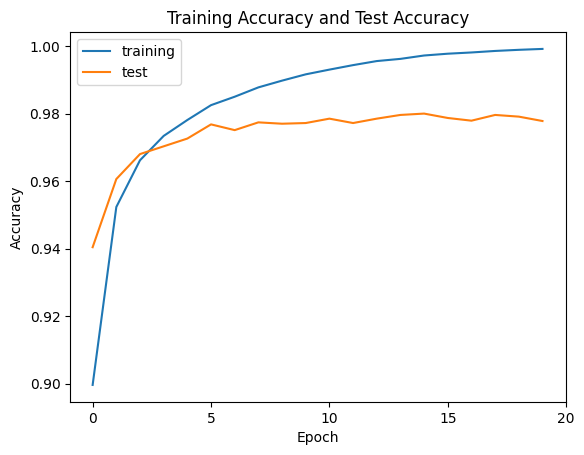

((128, 1, 256), 0.9811999797821045)


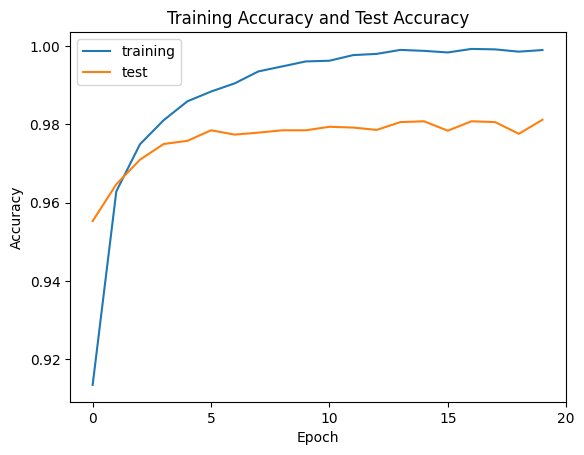

((128, 1, 350), 0.982200026512146)


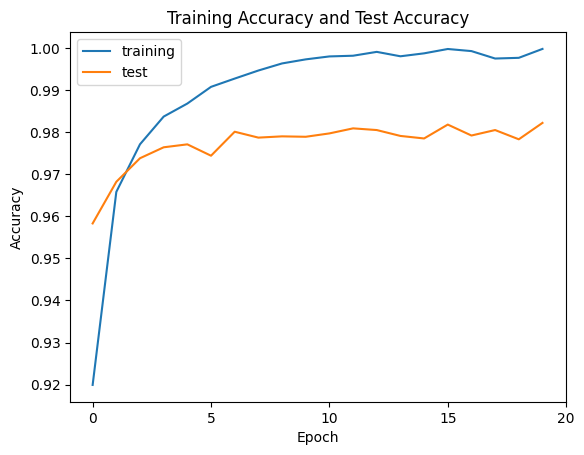

((128, 2, 128), 0.9797999858856201)


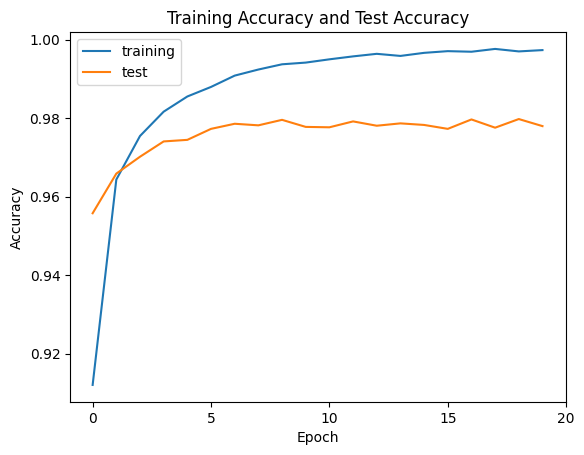

((128, 2, 256), 0.9818999767303467)


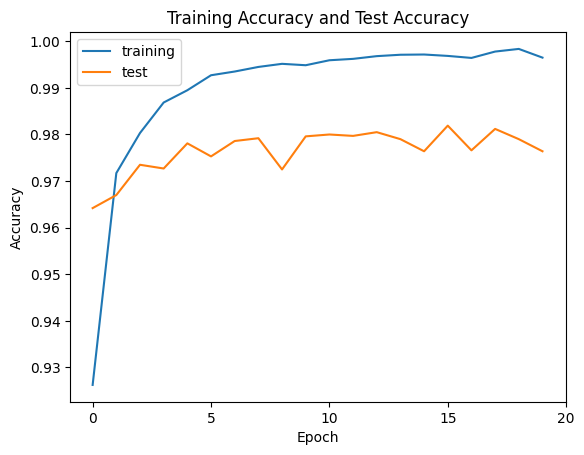

((128, 2, 350), 0.9835000038146973)


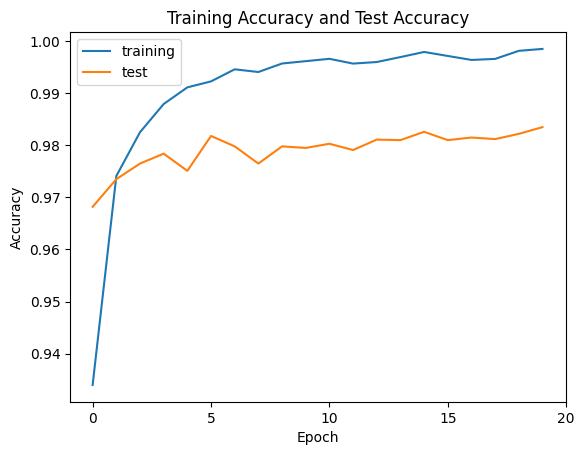

((128, 3, 128), 0.9789999723434448)


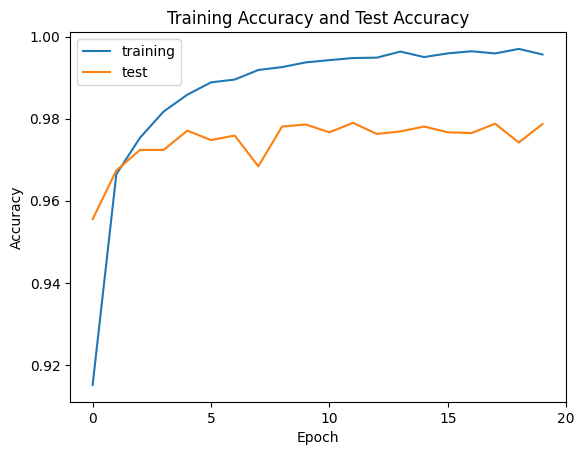

((128, 3, 256), 0.9814000129699707)


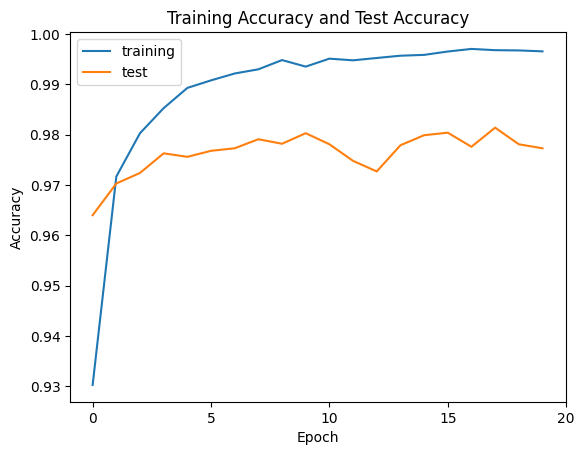

((128, 3, 350), 0.9828000068664551)


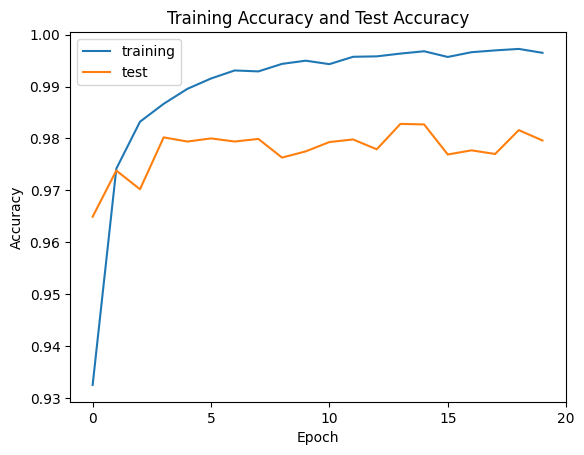

((196, 1, 128), 0.9767000079154968)


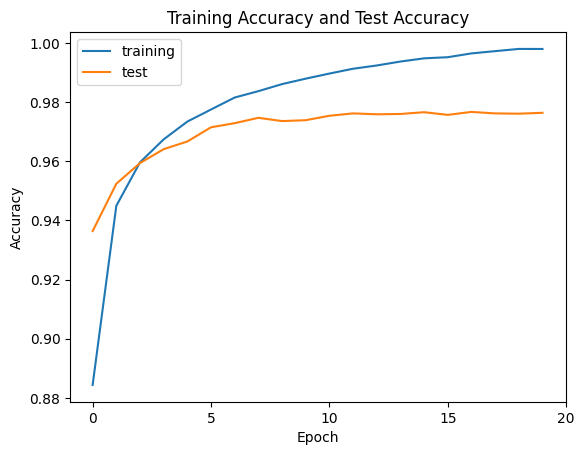

((196, 1, 256), 0.9807999730110168)


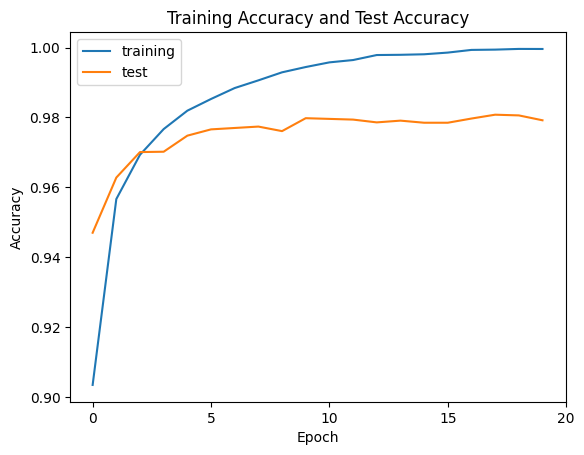

((196, 1, 350), 0.9824000000953674)


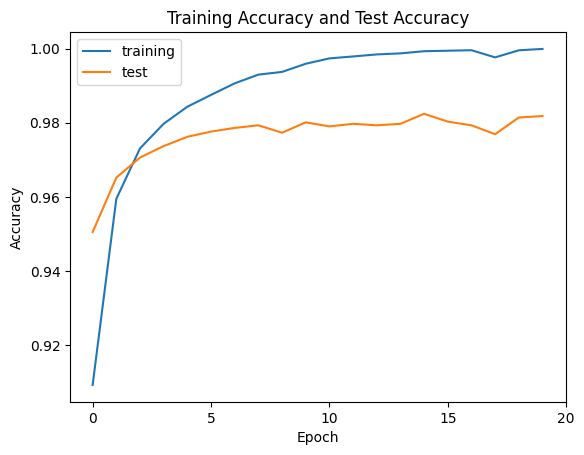

((196, 2, 128), 0.9786999821662903)


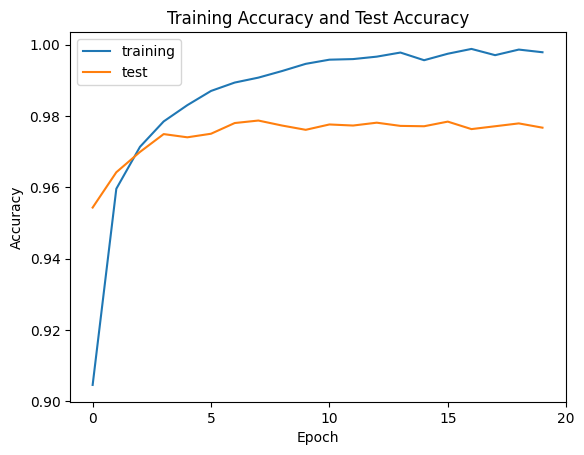

((196, 2, 256), 0.9821000099182129)


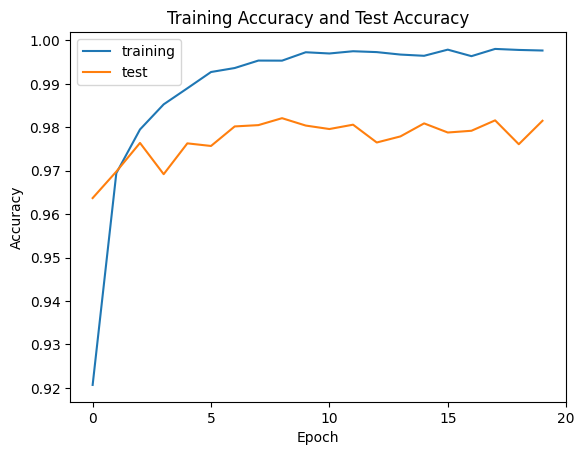

((196, 2, 350), 0.9814000129699707)


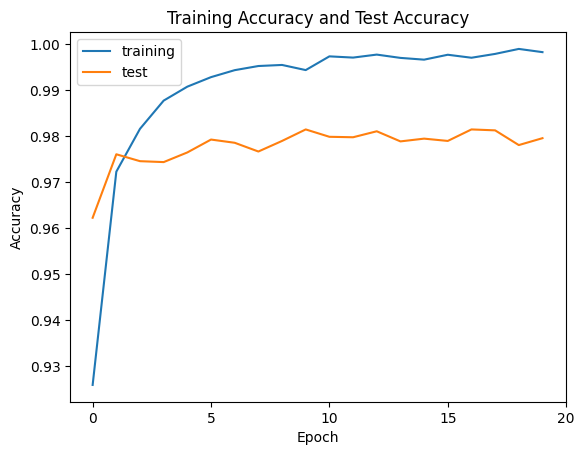

((196, 3, 128), 0.9799000024795532)


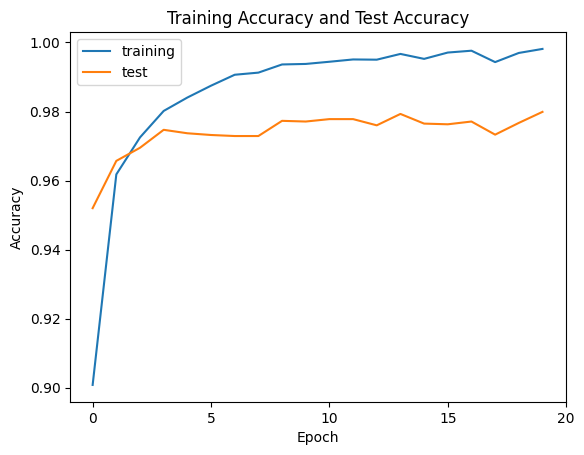

((196, 3, 256), 0.983299970626831)


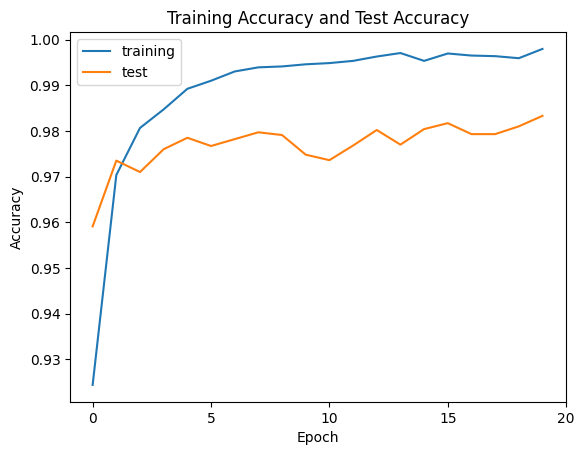

((196, 3, 350), 0.9815000295639038)


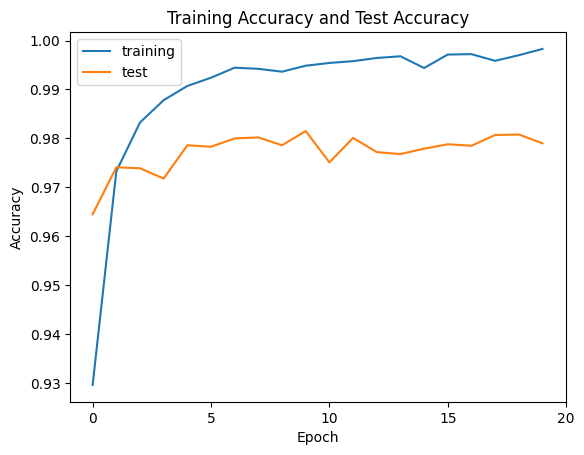

In [24]:
for i, h in enumerate (histories):
    print(results_list[i])
    plt.plot(h.history['accuracy'], label = 'training')
    plt.plot(h.history['val_accuracy'], label = 'test')
    plt.xticks(ticks = range(0, 21, 5))
    plt.title('Training Accuracy and Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [25]:
# list of values
values = list(results.values())
# list of keys
keys = list(results.keys())
# highest accuracy rate
## START CODE HERE ##
max_acc = max(values)
# best combination
best_key = keys[values.index(max_acc)]
## END CODE HERE ##
opt_batch_size, opt_n_h_layers, opt_n_h_neurons  = best_key
print('Best combination:')
print('\tnumber of hidden layers = {}'.format(opt_n_h_layers))
print('\tnumber of hidden neurons = {}'.format(opt_n_h_neurons))
print('\tbatch size = {}'.format(opt_batch_size))
print('Highest validation accuracy rate: {:.1f}%.'.format(
    max_acc * 100))

Best combination:
	number of hidden layers = 2
	number of hidden neurons = 350
	batch size = 128
Highest validation accuracy rate: 98.4%.


* As we can see increased number of neurons in hidden layers, increases the accuracy 

* Also we can note that adding number of layers does not increase accuracy, so 2 is the optimum number for layers.

* Batch size helps learn faster as it utilizes more data per computing resource and parallelization but it may or may not increase accuracy. smaller batch sizes might improve generalization.

* We got highest training acccuracy of 99.9% and test accuracy 98.2% for btch_size= 196, layers= 1 and hidden_neurons= 350

* Finally for layers =2, hidden_neurons = 350 and batch size = 128, we Got the highest 98.4% accuracy.